In [207]:
import pandas as pd
import numpy as np

#1. Load "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.).

In [208]:
data = pd.read_csv('https://raw.githubusercontent.com/pvateekul/2110446_DSDE_2023s2/main/code/Week03_ML/mushroom2020_dataset.csv')

In [209]:
data.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [210]:
data.isnull().sum()

id                               0
label                           60
cap-shape                        0
cap-surface                     27
bruises                         99
odor                            99
gill-attachment                 99
gill-spacing                   130
gill-size                      121
stalk-shape                    121
stalk-root                      31
stalk-surface-above-ring        31
stalk-surface-below-ring        31
veil-type                       62
ring-number                     62
ring-type                       62
spore-print-color               56
population                      56
habitat                         31
cap-color-rate                  27
gill-color-rate                121
veil-color-rate                 62
stalk-color-above-ring-rate     31
stalk-color-below-ring-rate     62
dtype: int64

# 2. Drop rows where the target (label) variable is missing.

In [211]:
data.dropna(subset=['label'], inplace=True)

# 3. Drop the following variables

In [212]:
data.drop(['id', 'gill-attachment', 'gill-spacing', 'gill-size' ,'gill-color-rate', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring-rate', 'stalk-color-below-ring-rate', 'veil-color-rate', 'veil-type'], axis=1, inplace=True)

In [213]:
data.columns

Index(['label', 'cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'cap-color-rate'],
      dtype='object')

# 4. Examine the number of rows, the number of digits, and whether any are missing.

In [214]:
data.shape

(5764, 12)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5823
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              5764 non-null   object 
 1   cap-shape          5764 non-null   object 
 2   cap-surface        5737 non-null   object 
 3   bruises            5665 non-null   object 
 4   odor               5665 non-null   object 
 5   stalk-shape        5643 non-null   object 
 6   ring-number        5702 non-null   object 
 7   ring-type          5702 non-null   object 
 8   spore-print-color  5708 non-null   object 
 9   population         5708 non-null   object 
 10  habitat            5733 non-null   object 
 11  cap-color-rate     5737 non-null   float64
dtypes: float64(1), object(11)
memory usage: 585.4+ KB


# 6. Convert the label variable e (edible) to 1 and p (poisonous) to 0 and check the quantity. class0: class1

In [216]:
def convert_label(val):
  if val == 'e':
    return 1
  else:
    return 0

In [217]:
data['label'] = data['label'].apply(convert_label)

In [218]:
data.label.value_counts()

0    3660
1    2104
Name: label, dtype: int64

# Create Pipelines for Numerical and Categorical Features
*  SimpleImputer to fill in the missing values.

*  StandardScaler to scale the value to range from 0 to 1.

*  OneHotEncoder to split to many numerical columns for model training.

In [219]:
data.columns

Index(['label', 'cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'cap-color-rate'],
      dtype='object')

In [220]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_cols = ['cap-color-rate']
cat_cols = ['cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat']

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Create ColumnTransformer to Apply the Pipeline for Each Column Set

In [221]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
], n_jobs=-1)

# Add a Model to the Final Pipeline

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=2020)
model_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', model)
])

# Display the pipeline

In [223]:
from sklearn import set_config

set_config(display='diagram')
display(model_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['cap-color-rate']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'odor',
                                                   'stalk-shape', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model', RandomForestClassifier(random_state=2020))])

# 8. Split train/test with 20% test, stratify, and seed = 2020.

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data[num_cols+cat_cols]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 2020)

In [225]:
len(X_train)

4611

In [226]:
len(X_test)

1153

In [227]:
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible'], digits=4))

              precision    recall  f1-score   support

   Poisonous     1.0000    1.0000    1.0000       732
      Edible     1.0000    1.0000    1.0000       421

    accuracy                         1.0000      1153
   macro avg     1.0000    1.0000    1.0000      1153
weighted avg     1.0000    1.0000    1.0000      1153



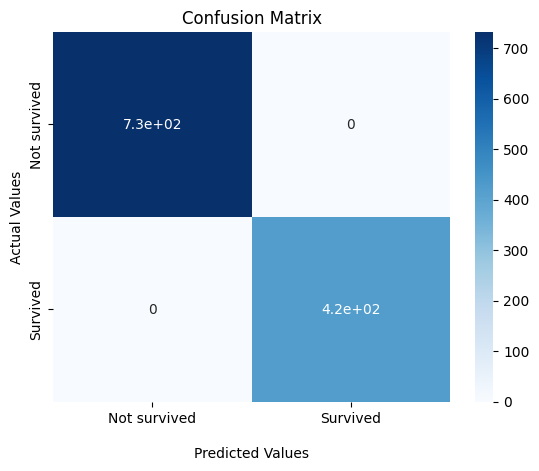

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_matrix(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
    ax.yaxis.set_ticklabels(['Not survived', 'Survived'])
    plt.show()

conf_matrix(y_test, y_pred)

# GridSearchCV
list of parameters that can be adjust


In [229]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', StandardScaler())]),
                                    ['cap-color-rate']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['cap-shape', 'cap-surface', 'bruises', 'odor',
                                     'stalk-shape', 'ring-number', 'ring-type',
                                     'spo

# Add the pipeline to Grid Search

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid= {'model__criterion':['entropy', 'gini'],
            'model__max_depth': [2,3,6],
            'model__min_samples_leaf':[2,5,10],
            'model__n_estimators': [100, 200]
            }
gs_pipeline = GridSearchCV(model_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
gs_pipeline.fit(X_train, y_train)
print("Best parameter set: "+str(gs_pipeline.best_params_))

Best parameter set: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 2, 'model__n_estimators': 200}


              precision    recall  f1-score   support

Not survived     1.0000    0.9986    0.9993       732
    Survived     0.9976    1.0000    0.9988       421

    accuracy                         0.9991      1153
   macro avg     0.9988    0.9993    0.9991      1153
weighted avg     0.9991    0.9991    0.9991      1153



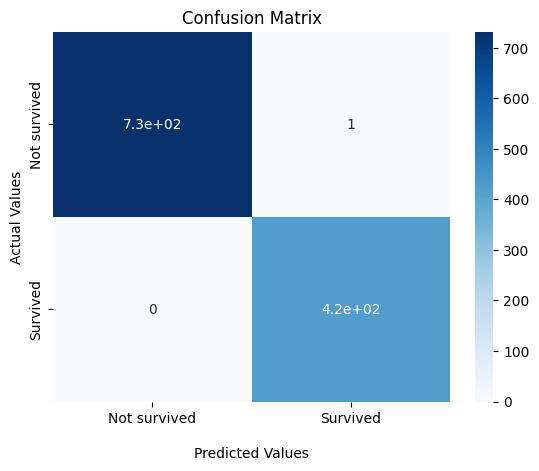

In [231]:
y_pred_gs = gs_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_gs, target_names=['Not survived', 'Survived'], digits=4))
conf_matrix(y_test, y_pred_gs)

# Install mlflow

In [232]:
!pip install mlflow --quiet --use-deprecated=legacy-resolver

# Import libraries

In [233]:
# Importing all Libraries
import mlflow
import mlflow.sklearn
#mlflow.set_experiment('mlflow-demo')

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Simple MLFLow Workflow for Scikit-Learn
1. Start an experiment using mlflow.start_run() which switches the context of your existing model code to enable mlflow tracking.
2. We log the run parameters with mlflow.log_param()
3. We log the model metrics (mean accuracy on the training set in this case) with mlflow.log_metric().
4. After model training and evaluation, I have logged the model using mlflow.sklearn.log_model().

In [234]:
local_registry = "sqlite:///mlruns.db"
mlflow.set_tracking_uri(local_registry)
experiment_id = mlflow.set_experiment('test_experiment')

def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    return accuracy

def train_model(criterion, max_depth, min_samples_leaf, n_estimators):

    # Starting the Experiement
    with mlflow.start_run():

        # Model building
        model = RandomForestClassifier(criterion=criterion, max_depth=max_depth,min_samples_leaf=min_samples_leaf, n_estimators=n_estimators,random_state=2020)
        model_pipeline = Pipeline(steps=[
                        ('col_trans', col_trans),
                        ('model', model)
                        ])

        model_pipeline.fit(X_train, y_train)   # Model Training
        y_pred = model_pipeline.predict(X_test)  # Model Prediction on Testing data
        (accuracy) = eval_metrics(y_test, y_pred)

        print('Random Forest (criterion=%s, max_depth=%d, min_samples_leaf=%d, n_estimators=%d):'%(criterion, max_depth, min_samples_leaf, n_estimators))
        print('Accuracy: {:.4f}'.format(accuracy))

        # Logging Parameters
        mlflow.log_param("criterion", criterion)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_param("n_estimators", n_estimators)

        # Logging Metrics
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

        # Model Logging
        mlflow.sklearn.log_model(model_pipeline, 'model_pipeline')

        return model_pipeline

# Train various RandomForest model with different parameter
(criterion, max_depth, min_sameples_leaf, n_estimators)

In [242]:
from itertools import product

all_params = product(param_grid['model__criterion'],
                     param_grid['model__max_depth'],
                     param_grid['model__min_samples_leaf'],
                     param_grid['model__n_estimators'])

# Iterate over each combination of parameters and call train_model function
for params in all_params:
    train_model(*params)

Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9679
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=200):
Accuracy: 0.9670
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=5, n_estimators=100):
Accuracy: 0.9679
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=5, n_estimators=200):
Accuracy: 0.9670
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=10, n_estimators=100):
Accuracy: 0.9679
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=10, n_estimators=200):
Accuracy: 0.9670
Random Forest (criterion=entropy, max_depth=3, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9766
Random Forest (criterion=entropy, max_depth=3, min_samples_leaf=2, n_estimators=200):
Accuracy: 0.9748
Random Forest (criterion=entropy, max_depth=3, min_samples_leaf=5, n_estimators=100):
Accuracy: 0.9766
Random Forest (criterion=entropy, max_depth=3, min_samples_leaf=5, n_es

# MLflow Models

An MLflow Model is a standard format for packaging machine learning models that can be used in a variety of downstream tools

In [243]:
#Search best 5 runs
best_run_df = mlflow.search_runs(order_by=['metrics.accuracy DESC'], max_results=5)
best_run_df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.max_depth,params.n_estimators,params.min_samples_leaf,params.criterion,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type
0,6175ca2025834827aaa499fe512ce488,1,FINISHED,/content/mlruns/1/6175ca2025834827aaa499fe512c...,2024-02-12 16:16:08.529000+00:00,2024-02-12 16:16:11.465000+00:00,1.0,10,200,5,gini,root,/usr/local/lib/python3.10/dist-packages/colab_...,merciful-cod-86,"[{""run_id"": ""6175ca2025834827aaa499fe512ce488""...",LOCAL
1,68b72e89ae3b4856a045af28d389a2ef,1,FINISHED,/content/mlruns/1/68b72e89ae3b4856a045af28d389...,2024-02-12 16:16:05.854000+00:00,2024-02-12 16:16:08.515000+00:00,1.0,10,100,5,gini,root,/usr/local/lib/python3.10/dist-packages/colab_...,amusing-gnat-114,"[{""run_id"": ""68b72e89ae3b4856a045af28d389a2ef""...",LOCAL
2,1de3943535244ac0b4cdcec669151bf8,1,FINISHED,/content/mlruns/1/1de3943535244ac0b4cdcec66915...,2024-02-12 16:16:02.894000+00:00,2024-02-12 16:16:05.840000+00:00,1.0,10,200,3,gini,root,/usr/local/lib/python3.10/dist-packages/colab_...,tasteful-stoat-197,"[{""run_id"": ""1de3943535244ac0b4cdcec669151bf8""...",LOCAL
3,bb47fc0ebc834603a0f5eefbfaa8afda,1,FINISHED,/content/mlruns/1/bb47fc0ebc834603a0f5eefbfaa8...,2024-02-12 16:15:59.813000+00:00,2024-02-12 16:16:02.880000+00:00,1.0,10,100,3,gini,root,/usr/local/lib/python3.10/dist-packages/colab_...,clumsy-ant-168,"[{""run_id"": ""bb47fc0ebc834603a0f5eefbfaa8afda""...",LOCAL
4,3d6e3e3d235d4b4f9fa739a035de407b,1,FINISHED,/content/mlruns/1/3d6e3e3d235d4b4f9fa739a035de...,2024-02-12 16:15:56.663000+00:00,2024-02-12 16:15:59.796000+00:00,1.0,10,200,2,gini,root,/usr/local/lib/python3.10/dist-packages/colab_...,kindly-snake-838,"[{""run_id"": ""3d6e3e3d235d4b4f9fa739a035de407b""...",LOCAL


In [240]:
run_id = str(best_run_df.loc[0, 'run_id'])
print('run_id: ', run_id)

run_id = str(best_run_df.loc[0, 'run_id'])
model_uri = f"runs:/{run_id}/model"
print('model_uri: ', model_uri)

run_id:  6175ca2025834827aaa499fe512ce488
model_uri:  runs:/6175ca2025834827aaa499fe512ce488/model


In [241]:
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(model_uri=f"runs:/{run_id}/model_pipeline")

# Predict on a Pandas DataFrame.
predicted = loaded_model.predict(pd.DataFrame(X_test))

print(classification_report(y_test, predicted, target_names=['Edible', 'Poisonous'], digits=4))

              precision    recall  f1-score   support

      Edible     1.0000    1.0000    1.0000       732
   Poisonous     1.0000    1.0000    1.0000       421

    accuracy                         1.0000      1153
   macro avg     1.0000    1.0000    1.0000      1153
weighted avg     1.0000    1.0000    1.0000      1153

